In [1]:
# Bước 1: Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

import graphviz  # Dùng để visualize decision tree (cần cài đặt graphviz system)
# Nếu cần: !pip install graphviz

####################################
# Bước 2: Đọc và chuẩn bị dữ liệu
####################################

# Ví dụ với dữ liệu Breast Cancer (có thể thay bằng link hoặc file CSV)
# Đọc dữ liệu Breast Cancer Wisconsin Diagnostic từ file CSV đã tải về
breast_cancer_data = pd.read_csv('wdbc.data')  # Chèn đường dẫn thực tế

# Đặt tên cho các cột dựa trên mô tả trong wdbc.names
columns = [
    'ID', 'Diagnosis',
    'Radius_Mean', 'Texture_Mean', 'Perimeter_Mean', 'Area_Mean', 'Smoothness_Mean', 'Compactness_Mean',
    'Concavity_Mean', 'Concave_Points_Mean', 'Symmetry_Mean', 'Fractal_Dimension_Mean',
    'Radius_SE', 'Texture_SE', 'Perimeter_SE', 'Area_SE', 'Smoothness_SE', 'Compactness_SE',
    'Concavity_SE', 'Concave_Points_SE', 'Symmetry_SE', 'Fractal_Dimension_SE',
    'Radius_Worst', 'Texture_Worst', 'Perimeter_Worst', 'Area_Worst', 'Smoothness_Worst', 'Compactness_Worst',
    'Concavity_Worst', 'Concave_Points_Worst', 'Symmetry_Worst', 'Fractal_Dimension_Worst'
]
# Hiển thị lại dữ liệu với tên cột
breast_cancer_data.columns = columns

#Cột ID không chứa thông tin quan trọng cho việc xây dựng mô hình nên bạn có thể loại bỏ: 
breast_cancer_data = breast_cancer_data.drop(columns=['ID'])    # Loại bỏ cột ID

# Kiểm tra dữ liệu
print(breast_cancer_data.head())
# print(breast_cancer_data.info())
# print(breast_cancer_data['Diagnosis'].value_counts())   # Kiểm tra phân phối nhãn


# Giả sử cột 'label' là nhãn, phần còn lại là features
features_bc = breast_cancer_data.drop('Diagnosis', axis=1)
labels_bc = breast_cancer_data['Diagnosis']

# Nếu label là chuỗi (M, B), chúng ta có thể encode thành 0/1
le = LabelEncoder()
labels_bc = le.fit_transform(labels_bc)  # M:1, B:0 chẳng hạn

# Tạo hàm tiện ích để chia dữ liệu theo nhiều tỉ lệ khác nhau và lưu lại
def stratified_split(X, y, train_size, random_state=42):
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_size, random_state=random_state)
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    return X_train, X_test, y_train, y_test

train_test_ratios = [0.4, 0.6, 0.8, 0.9]

splits_bc = {}  # Dictionary để lưu các tập dữ liệu
for ratio in train_test_ratios:
    X_train, X_test, y_train, y_test = stratified_split(features_bc, labels_bc, train_size=ratio)
    splits_bc[ratio] = (X_train, X_test, y_train, y_test)


  Diagnosis  Radius_Mean  Texture_Mean  Perimeter_Mean  Area_Mean  \
0         M        20.57         17.77          132.90     1326.0   
1         M        19.69         21.25          130.00     1203.0   
2         M        11.42         20.38           77.58      386.1   
3         M        20.29         14.34          135.10     1297.0   
4         M        12.45         15.70           82.57      477.1   

   Smoothness_Mean  Compactness_Mean  Concavity_Mean  Concave_Points_Mean  \
0          0.08474           0.07864          0.0869              0.07017   
1          0.10960           0.15990          0.1974              0.12790   
2          0.14250           0.28390          0.2414              0.10520   
3          0.10030           0.13280          0.1980              0.10430   
4          0.12780           0.17000          0.1578              0.08089   

   Symmetry_Mean  ...  Radius_Worst  Texture_Worst  Perimeter_Worst  \
0         0.1812  ...         24.99          23.41 

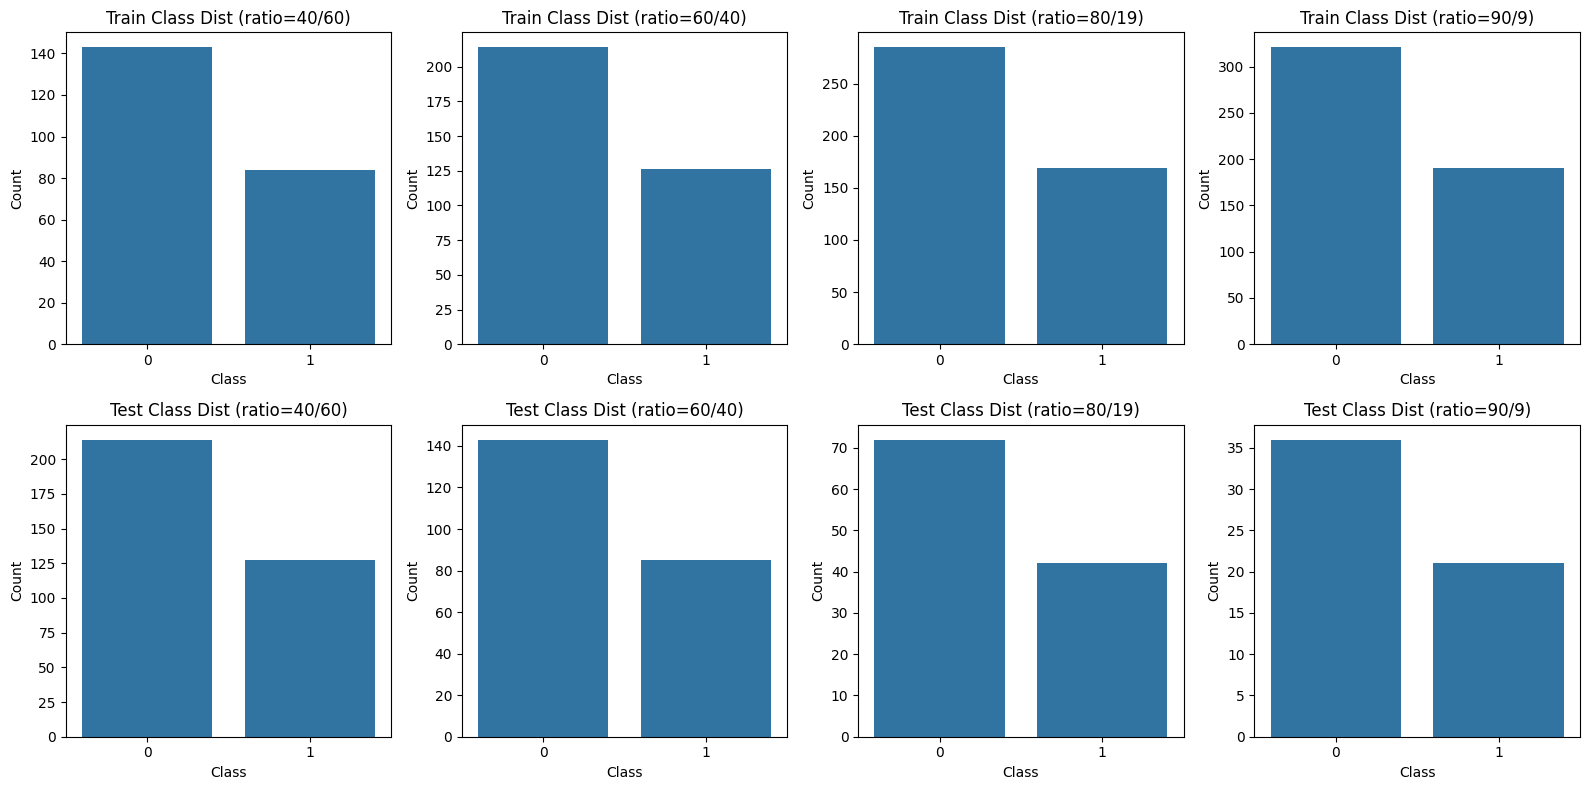

In [2]:

# ####################################
# # Bước 3: Trực quan hóa phân bố lớp
# ####################################

def plot_class_distribution(y, title="Class Distribution", ax=None):
    unique, counts = np.unique(y, return_counts=True)
    sns.barplot(x=unique, y=counts, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Class")
    ax.set_ylabel("Count")

# Tạo hình với 2 hàng, mỗi hàng chứa 4 biểu đồ con
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Vẽ phân bố lớp cho từng tập train
for i, ratio in enumerate(train_test_ratios):
    X_train, X_test, y_train, y_test = splits_bc[ratio]
    plot_class_distribution(y_train, title=f"Train Class Dist (ratio={int(ratio*100)}/{int((1-ratio)*100)})", ax=axes[0, i])

# Vẽ phân bố lớp cho từng tập test
for i, ratio in enumerate(train_test_ratios):
    X_train, X_test, y_train, y_test = splits_bc[ratio]
    plot_class_distribution(y_test, title=f"Test Class Dist (ratio={int(ratio*100)}/{int((1-ratio)*100)})", ax=axes[1, i])

# Căn chỉnh và hiển thị biểu đồ
plt.tight_layout()
plt.show()




Đã lưu cây quyết định cho tỷ lệ 0.4 tại decision_tree_bc_40_60.png


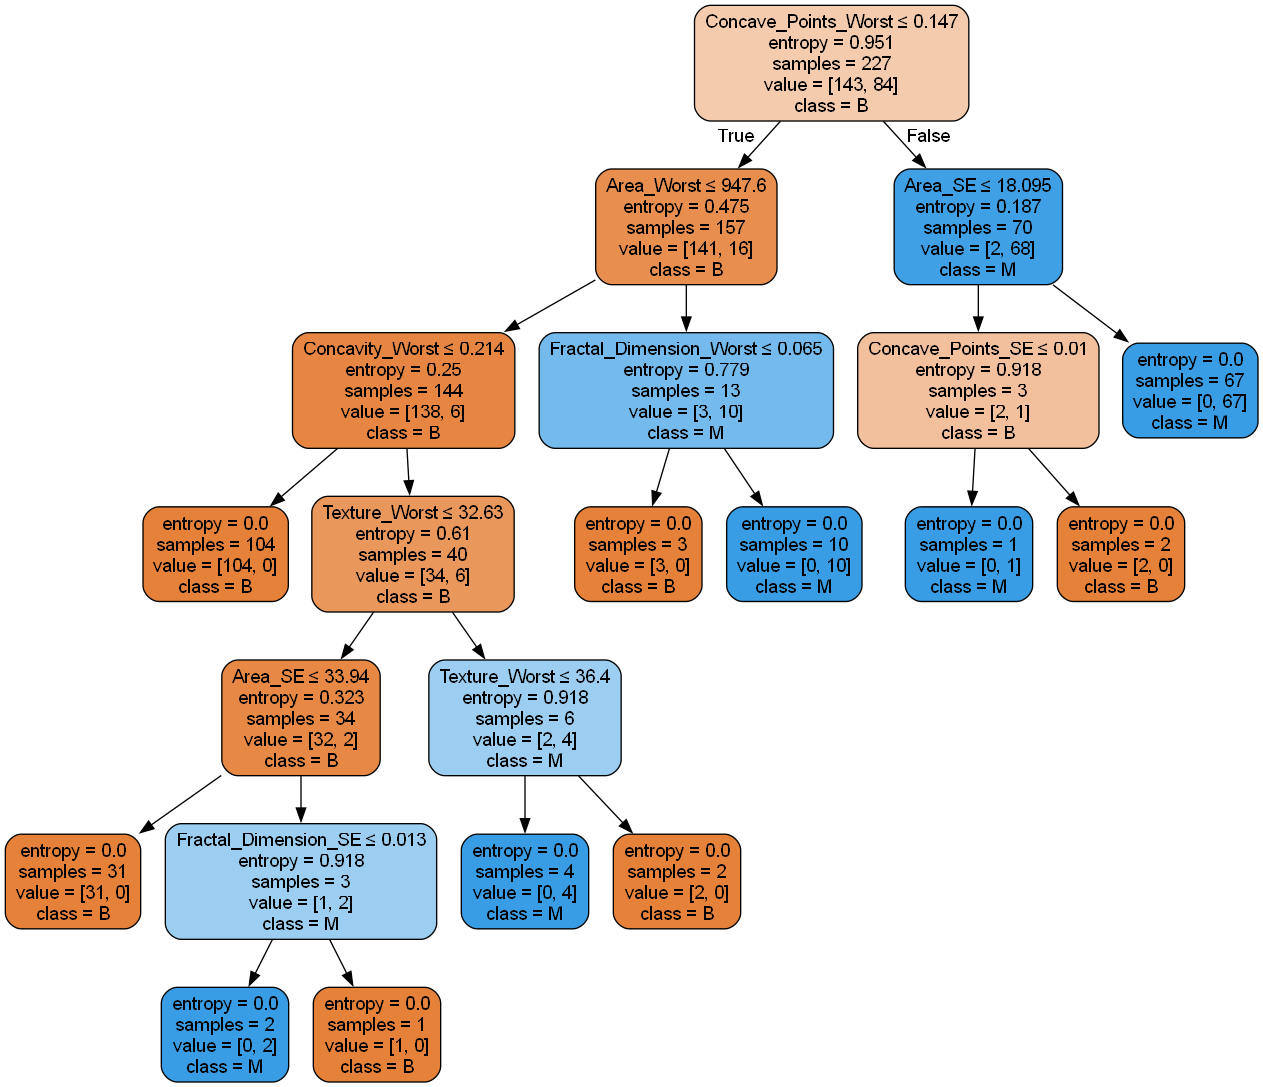

Đã lưu cây quyết định cho tỷ lệ 0.6 tại decision_tree_bc_60_40.png


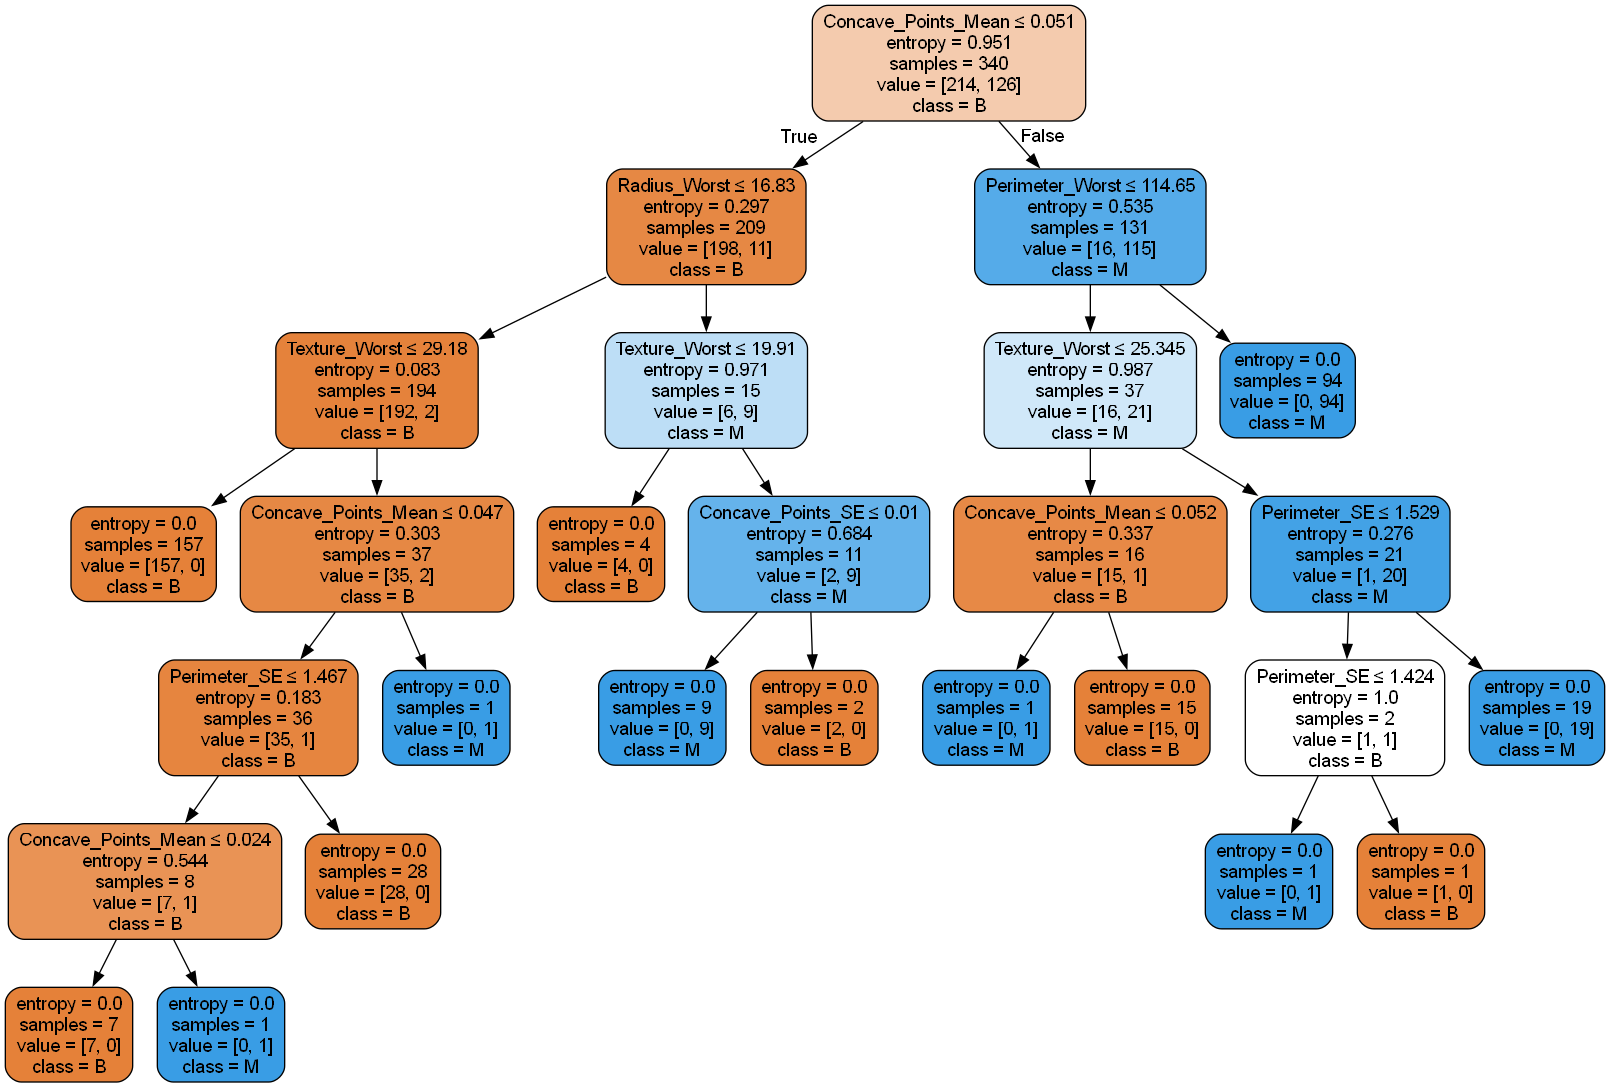

Đã lưu cây quyết định cho tỷ lệ 0.8 tại decision_tree_bc_80_19.png


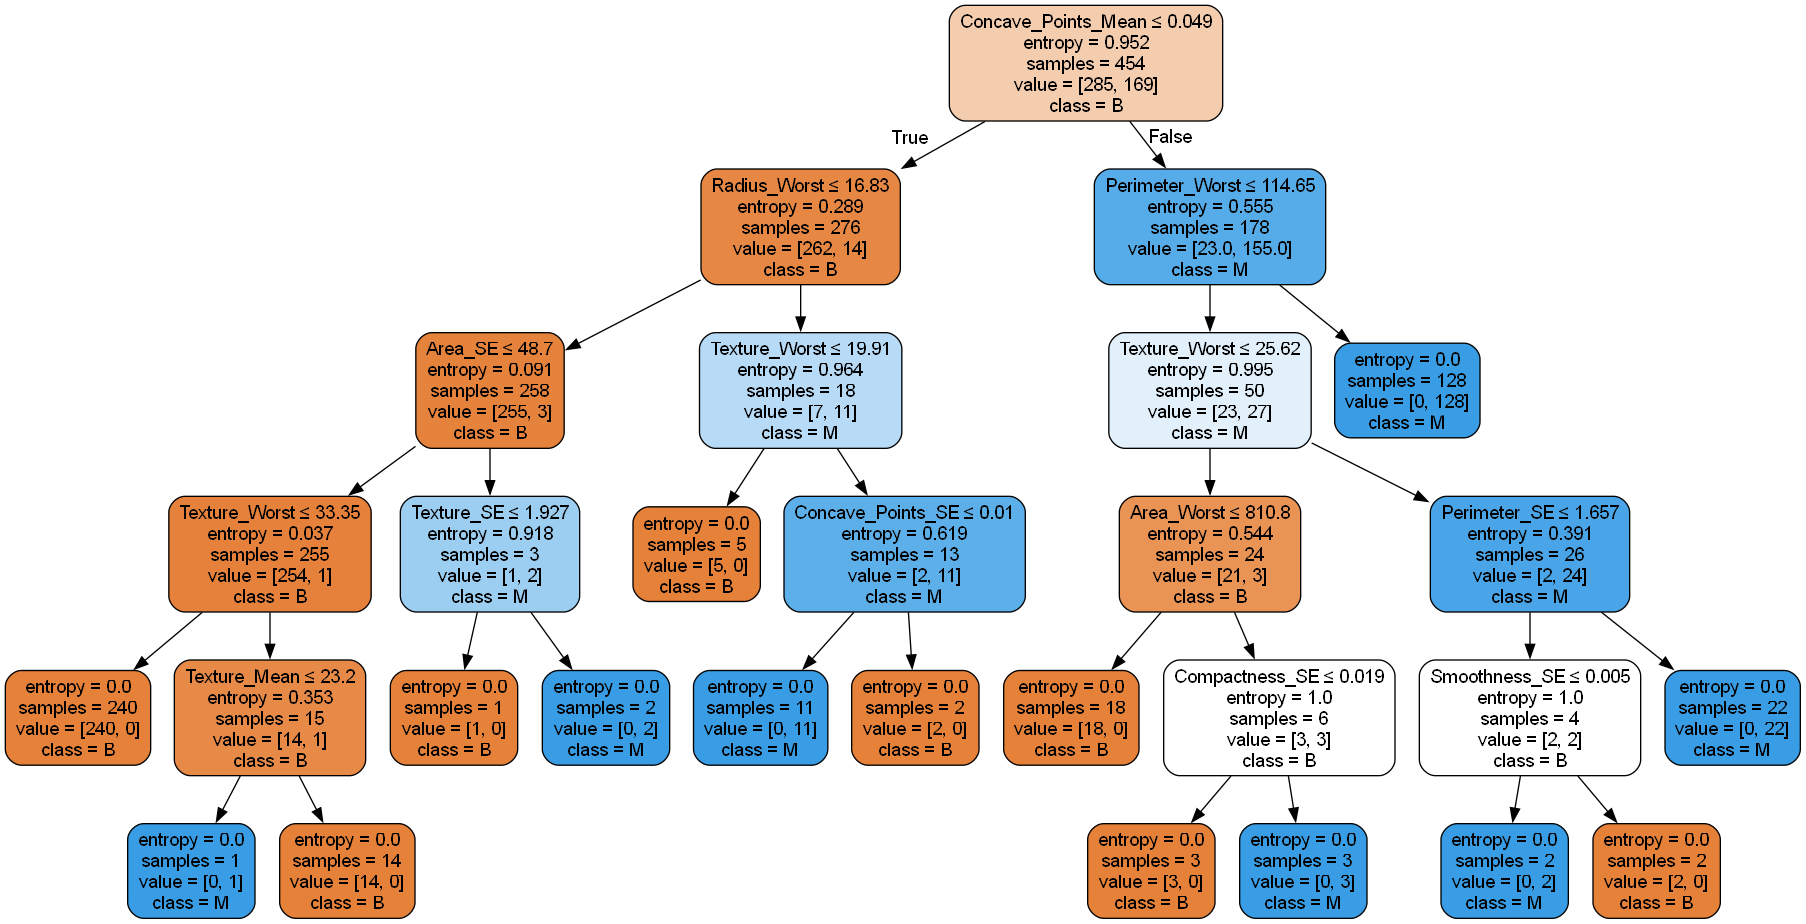

Đã lưu cây quyết định cho tỷ lệ 0.9 tại decision_tree_bc_90_9.png


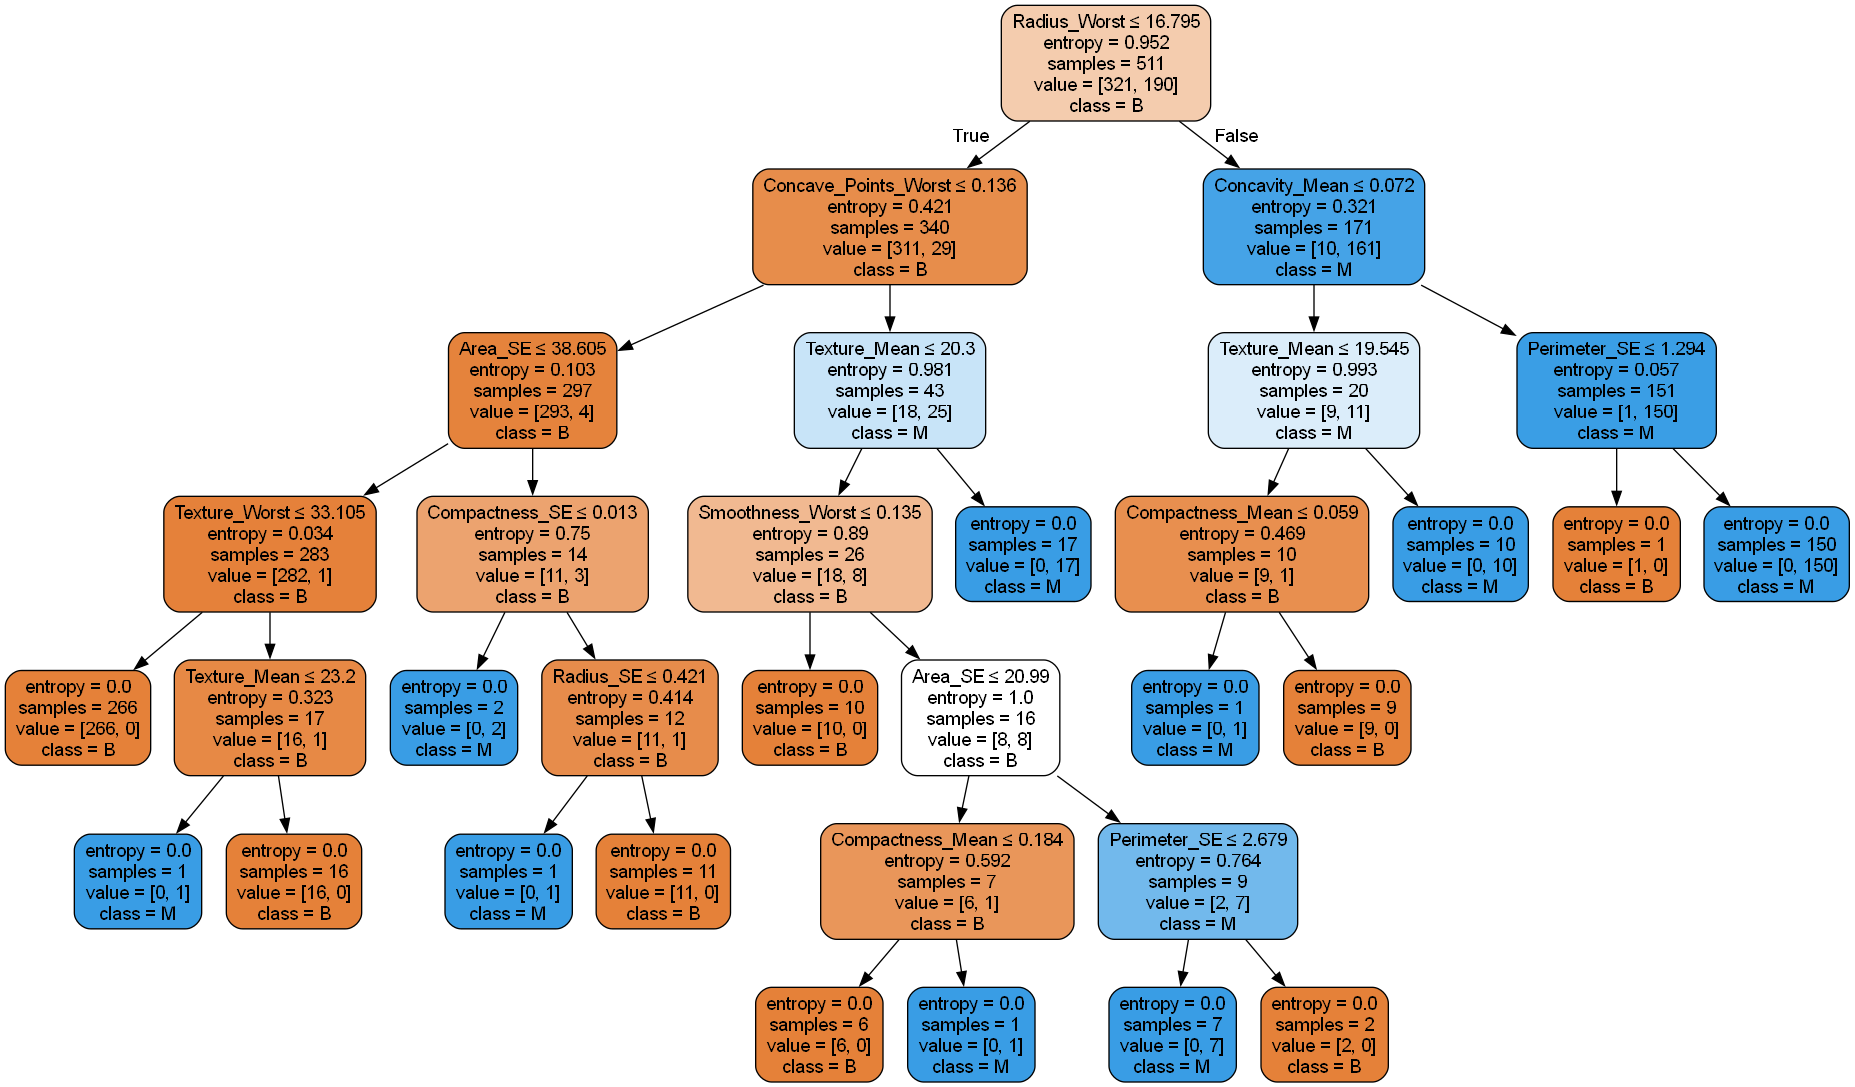

In [3]:

# ####################################
# # Bước 4 & 5: Huấn luyện mô hình Decision Tree & Trực quan hóa cây
# ####################################

def train_and_visualize_decision_tree(X_train, y_train, max_depth=None):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    return dt

def visualize_tree(dt, feature_names, class_names):
    dot_data = export_graphviz(
        dt, 
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        filled=True, rounded=True,
        special_characters=True
    )
    graph = graphviz.Source(dot_data)
    return graph

# Lặp qua từng tỷ lệ trong danh sách
for ratio in train_test_ratios:
    # Lấy tập dữ liệu train và test theo tỷ lệ hiện tại
    X_train, X_test, y_train, y_test = splits_bc[ratio]
    
    # Huấn luyện mô hình cây quyết định
    dt_model = train_and_visualize_decision_tree(X_train, y_train, max_depth=None)
    
    # Vẽ cây quyết định
    graph = visualize_tree(dt_model, feature_names=X_train.columns, class_names=['B', 'M'])
    
    # Xuất ra file ảnh với tên dựa trên tỷ lệ
    filename = f"decision_tree_bc_{int(ratio * 100)}_{int((1 - ratio) * 100)}"
    graph.render(filename, format='png', cleanup=True)
    print(f"Đã lưu cây quyết định cho tỷ lệ {ratio} tại {filename}.png")
     # Hiển thị hình ảnh trực tiếp trong Jupyter Notebook
    display(Image(filename=f"{filename}.png"))


In [6]:

####################################
# Bước 6: Đánh giá mô hình
####################################
def evaluate_model(dt, X_test, y_test):
    y_pred = dt.predict(X_test)  # Dự đoán trên dữ liệu test
    acc = accuracy_score(y_test, y_pred)  # Tính độ chính xác
    print("### Classification Report:")
    print(classification_report(y_test, y_pred))  # In báo cáo phân loại
    print("### Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))  # In ma trận nhầm lẫn
    print(f"### Accuracy: {acc:.4f}")
    return acc

# Khởi tạo danh sách lưu kết quả
evaluation_results = []

# Lặp qua từng tỷ lệ và đánh giá mô hình
for ratio in train_test_ratios:
    X_train, X_test, y_train, y_test = splits_bc[ratio]
    # Huấn luyện mô hình trên tập train
    dt_model = train_and_visualize_decision_tree(X_train, y_train, max_depth=None)
    
    # In tiêu đề cho tỷ lệ hiện tại
    print(f"\n# Kết quả đánh giá cho tỷ lệ {int(ratio * 100)}/{int((1 - ratio) * 100)}:")

    # Đánh giá mô hình và lưu kết quả
    acc = evaluate_model(dt_model, X_test, y_test)
    
    # Lưu kết quả vào danh sách
    evaluation_results.append({
        'Ratio': ratio,
        'Accuracy': acc
    })
    
    # In kết quả chi tiết
    print("\n---\n")

# In kết quả tổng quan
print("## Kết quả đánh giá mô hình cho các tỷ lệ:")
for result in evaluation_results:
    print(f"- Tỷ lệ {int(result['Ratio'] * 100)}/{int((1 - result['Ratio']) * 100)}: Accuracy = {result['Accuracy']:.4f}")



# Kết quả đánh giá cho tỷ lệ 40/60:
### Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       214
           1       0.91      0.90      0.90       127

    accuracy                           0.93       341
   macro avg       0.93      0.92      0.92       341
weighted avg       0.93      0.93      0.93       341

### Confusion Matrix:
[[203  11]
 [ 13 114]]
### Accuracy: 0.9296

---


# Kết quả đánh giá cho tỷ lệ 60/40:
### Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       143
           1       0.96      0.89      0.93        85

    accuracy                           0.95       228
   macro avg       0.95      0.94      0.94       228
weighted avg       0.95      0.95      0.95       228

### Confusion Matrix:
[[140   3]
 [  9  76]]
### Accuracy: 0.9474

---


# Kết quả đánh giá cho tỷ lệ 80/19:
### Classification Report:
          


### Khảo sát ảnh hưởng của max_depth ###

# Huấn luyện và đánh giá với max_depth = None
### Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

### Confusion Matrix:
[[70  2]
 [ 4 38]]
### Accuracy: 0.9474

# Huấn luyện và đánh giá với max_depth = 2
### Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        72
           1       0.80      0.95      0.87        42

    accuracy                           0.89       114
   macro avg       0.88      0.91      0.89       114
weighted avg       0.91      0.89      0.90       114

### Confusion Matrix:
[[62 10]
 [ 2 40]]
### Accuracy: 0.8947

# Huấn luyện và đánh giá với max_d

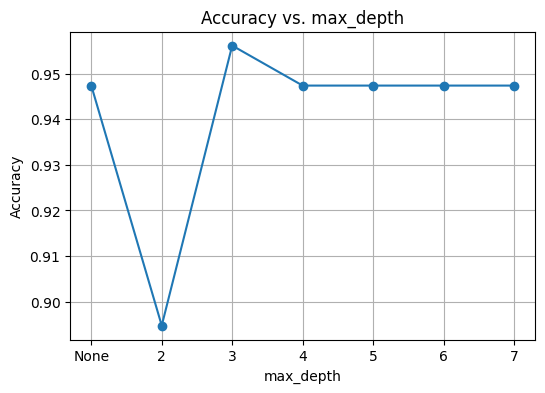

In [8]:
####################################
# Bước 7: Khảo sát ảnh hưởng của max_depth
####################################

# Chọn tỷ lệ mặc định để dùng cho khảo sát max_depth (ví dụ: 80/20)
default_ratio = 0.8  # Tỷ lệ mặc định
X_train, X_test, y_train, y_test = splits_bc[default_ratio]

max_depth_values = [None, 2, 3, 4, 5, 6, 7]
accuracies = []

print("\n### Khảo sát ảnh hưởng của max_depth ###")
for md in max_depth_values:
    print(f"\n# Huấn luyện và đánh giá với max_depth = {md}")
    # Huấn luyện mô hình với max_depth cụ thể
    dt_model_md = train_and_visualize_decision_tree(X_train, y_train, max_depth=md)
    
    # Đánh giá mô hình
    acc_md = evaluate_model(dt_model_md, X_test, y_test)
    accuracies.append(acc_md)

# Vẽ biểu đồ thể hiện sự thay đổi accuracy theo max_depth
plt.figure(figsize=(6, 4))
plt.plot([str(m) for m in max_depth_values], accuracies, marker='o')
plt.title("Accuracy vs. max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()